## Overview: Analyzing THETIS-MRV CO2 Emission Data

by: Robert Harrow

The European Union requires ships larger than 5000 tons that dock in the EU to declare their emissions to
the MRV system, which is made available [here](https://mrv.emsa.europa.eu/#public/emission-report).

We are tasked with answering the following questions:
* How many ships of each type are there?
* How do the emissions profiles differ for the different ship types?
* What is the relationship between ship Deadweight and emissions intensity?
* How many miles did each vessel in the database travel?

In [1]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import squarify
import seaborn as sns

## Data

Data for this analysis comes from the European Maritime Safety Agency (EMSA). In accordance to Regulation (EU) 2015/757, ships larger than 5000 tons that dock in the EU are required to declare their emissions to
EMSA's MRV system.

The data is released annually and can be downloaded from the EMSA website. The data for this analysis was downloaded for the years 2018, 2019 and 2020. Each year comes as a .xlsx file.

In [2]:
# We load the downloaded data into a pandas dataframe

data = glob.glob(os.path.join('data', "*.xlsx"))
data = pd.concat((pd.read_excel(f, header=2) for f in data), ignore_index=True)

/Users/robertharrow/projects/eu-maritime-co2-emissions/venv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/robertharrow/projects/eu-maritime-co2-emissions/venv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/robertharrow/projects/eu-maritime-co2-emissions/venv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# Let's preview the data
data

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Port of Registry,Home Port,Ice Class,DoC issue date,DoC expiry date,...,CO₂ emissions per distance on laden voyages [kg CO₂ / n mile],CO₂ emissions per transport work (mass) on laden voyages [g CO₂ / m tonnes · n miles],CO₂ emissions per transport work (volume) on laden voyages [g CO₂ / m³ · n miles],CO₂ emissions per transport work (dwt) on laden voyages [g CO₂ / dwt carried · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Additional information to facilitate the understanding of the reported average operational energy efficiency indicators,Average density of the cargo transported [m tonnes / m³],Annual Total time spent at sea [hours],Total time spent at sea [hours]
0,6602898,OCEAN MAJESTY,Passenger ship,2020,EIV (31.73 gCO₂/t·nm),Madeira,NaN,NaN,01/07/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6703343,EQUALITY,Other ship types,2020,EIV (57.84 gCO₂/t·nm),Beirut,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7037806,IONIAN STAR,Ro-pax ship,2020,EIV (19.4 gCO₂/t·nm),NaN,NaN,NaN,31/03/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7043843,TALOS,Ro-ro ship,2020,EIV (48.71 gCO₂/t·nm),Piraeus,Piraeus,NaN,16/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7128332,SEA WIND,Ro-pax ship,2020,EIV (9.29 gCO₂/t·nm),Tallinn,Tallinn,IB,26/04/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36690,9838199,BALT FLOT 18,Chemical tanker,2018,EEDI (12.93 gCO₂/t·nm),St.Petersburg,St.Petersburg,IC,27/05/2020,30/06/2020,...,117.12,16.93,NaN,NaN,NaN,NaN,NaN,NaN,1008.24,1008.24
36691,9839064,INFINITY SKY,Bulk carrier,2018,NaN,NaN,NaN,NaN,11/03/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
36692,9840790,DARYA RAMA,Bulk carrier,2018,NaN,Hong Kong,Hong Kong,NaN,08/03/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
36693,9847140,CHEMICAL CONTENDER,Chemical tanker,2018,EIV (9.16 gCO₂/t·nm),Monrovia,Monrovia,NaN,20/04/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746.30,746.30


In [4]:
# Let's see all the columns available in the data
data.columns

Index(['IMO Number', 'Name', 'Ship type', 'Reporting Period',
       'Technical efficiency', 'Port of Registry', 'Home Port', 'Ice Class',
       'DoC issue date', 'DoC expiry date', 'Verifier Number', 'Verifier Name',
       'Verifier NAB', 'Verifier Address', 'Verifier City',
       'Verifier Accreditation number', 'Verifier Country', 'A', 'B', 'C', 'D',
       'Total fuel consumption [m tonnes]',
       'Fuel consumptions assigned to On laden [m tonnes]',
       'Total CO₂ emissions [m tonnes]',
       'CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]',
       'CO₂ emissions assigned to Passenger transport [m tonnes]',
       'CO₂ emissions assigned to Freight transport [m t

Our business case calls us to answer a set of specific questions outlined above. For efficiency, we reduce the columns to only the relevant ones -- that is columns that have to do with CO2 emissions, fuel usage, and a few other details that may prove useful.

In [5]:
# First, we define the relevant columns
relevant_cols = ['IMO Number', 'Name', 'Ship type', 'Reporting Period', 'Technical efficiency',
                 'Total fuel consumption [m tonnes]', 'Total CO₂ emissions [m tonnes]', 'CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]',
                 'CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]',
                 'CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]',
                 'CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]',
                 'Annual average Fuel consumption per distance [kg / n mile]',
                 'Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles]',
                 'Fuel consumption per transport work (dwt) on laden voyages [g / dwt carried · n miles]',
                 'Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]',
                 'Annual average CO₂ emissions per distance [kg CO₂ / n mile]']

# Then define a new dataframe with the relevant data
rel_data = data[relevant_cols].copy()

### Data Preparation & Cleaning

Next we move to clean up the data. From the quick visual preview of some of the data above it's clear some fields are missing, or have some error messages where fields were calculated and resulted in things like division by zero.

#### Dealing with non-CO2 emitting ships

As shown below, 1,353 records have no fuel consumption or Co2 emissions. This is likely to be due to non-active ships which used no fuel and/or did not move.

I'm deciding to omit it from the analysis.

In [6]:
# Show where CO2 emissions are 0
rel_data.loc[rel_data['Total CO₂ emissions [m tonnes]'] == 0.0]

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],Annual average Fuel consumption per distance [kg / n mile],Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles],Fuel consumption per transport work (dwt) on laden voyages [g / dwt carried · n miles],Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles],Annual average CO₂ emissions per distance [kg CO₂ / n mile]
14,7326893,MAWASHI EXPRESS,Other ship types,2020,EIV (8.86 gCO₂/t·nm),0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,Division by zero!,NaN,Division by zero!,Division by zero!
103,8214889,HAK,General cargo ship,2020,EIV (7.63 gCO₂/t·nm),0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,Division by zero!,NaN,Division by zero!,Division by zero!
135,8414726,ZHEN HUA 24,Other ship types,2020,EIV (8.61 gCO₂/t·nm),0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,Division by zero!,NaN,Division by zero!,Division by zero!
136,8414738,ZHEN HUA 23,Other ship types,2020,EIV (8.57 gCO₂/t·nm),0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,Division by zero!,NaN,Division by zero!,Division by zero!
386,9034925,RIO BALSAS,Bulk carrier,2020,EIV (4 gCO₂/t·nm),0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,NaN,NaN,NaN,Division by zero!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36631,9816335,ALMI TITAN,Oil tanker,2018,EEDI (2.19 gCO₂/t·nm),0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,NaN,NaN,NaN,Division by zero!
36656,9820996,ULTRA OSORNO,Bulk carrier,2018,EEDI (5.55 gCO₂/t·nm),0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,NaN,NaN,NaN,Division by zero!
36662,9826433,NORD BALTIC,Bulk carrier,2018,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,NaN,NaN,NaN,Division by zero!
36691,9839064,INFINITY SKY,Bulk carrier,2018,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Division by zero!,NaN,NaN,NaN,Division by zero!


In [7]:
# Dropping these rows
rel_data.drop(rel_data[rel_data['Total CO₂ emissions [m tonnes]'] == 0.0].index, inplace=True)

A handful of fields also has a 'Division by zero!' error. It looks like this only happens for ships that had fuel emissions at berth. Meaning these ships were operating but not moving between ports.

In [8]:
# Show fields where annual average fuel consumption is zero
rel_data.loc[rel_data['Annual average Fuel consumption per distance [kg / n mile]'] == 'Division by zero!']

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],Annual average Fuel consumption per distance [kg / n mile],Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles],Fuel consumption per transport work (dwt) on laden voyages [g / dwt carried · n miles],Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles],Annual average CO₂ emissions per distance [kg CO₂ / n mile]
1268,9210153,MSC SINFONIA,Passenger ship,2020,EIV (4.22 gCO₂/t·nm),210.60,675.18,0.0,0.0,0.0,675.18,Division by zero!,NaN,NaN,NaN,Division by zero!
1752,9246102,MSC LIRICA,Passenger ship,2020,EIV (4.39 gCO₂/t·nm),362.70,1162.82,0.0,0.0,0.0,1162.82,Division by zero!,NaN,NaN,NaN,Division by zero!
3211,9320087,MSC MUSICA,Passenger ship,2020,EIV (3.29 gCO₂/t·nm),270.10,865.94,0.0,0.0,0.0,865.94,Division by zero!,NaN,NaN,NaN,Division by zero!
4555,9387073,MSC POESIA,Passenger ship,2020,EIV (3.14 gCO₂/t·nm),321.60,1030.86,0.0,0.0,0.0,1030.86,Division by zero!,NaN,NaN,NaN,Division by zero!
7740,9585285,MSC DIVINA,Passenger ship,2020,EIV (3.06 gCO₂/t·nm),5503.00,17642.62,0.0,0.0,0.0,17642.62,Division by zero!,NaN,NaN,NaN,Division by zero!
12896,9145413,ICARUS III,Oil tanker,2019,EIV (8.17 gCO₂/t·nm),691.00,2215.35,0.0,0.0,0.0,0.00,Division by zero!,NaN,NaN,NaN,Division by zero!
32764,9566631,STELLAR SUNRISE,Other ship types,2018,EIV (6.5 gCO₂/t·nm),6414.21,19996.85,0.0,0.0,0.0,0.00,Division by zero!,Division by zero!,NaN,Division by zero!,Division by zero!
35905,9750024,ENGIE ZEEBRUGGE,LNG carrier,2018,NaN,1672.28,4651.12,0.0,0.0,0.0,4651.12,Division by zero!,NaN,NaN,NaN,Division by zero!


Because these fields are such a small fraction of the total dataset (0.6%) I'm choosing to omitt them from the analysis for now. We can always bring them back in should a business case deem them relevant.

In [9]:
rel_data.drop(rel_data[rel_data['Annual average Fuel consumption per distance [kg / n mile]'] == 'Division by zero!'].index, inplace=True)

#### Exploring missing values

Next, I look to see what percentage of fields are missing in the remaining columns.

In [10]:
print('Percentage of missing records')
print('--------------------')
for col in rel_data.columns:
    if rel_data[col].isna().sum() != 0:
        print('{}: {}%'.format(col, round(100*rel_data[col].isna().sum()/len(rel_data.index))))

Percentage of missing records
--------------------
Technical efficiency: 4%
Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles]: 88%
Fuel consumption per transport work (dwt) on laden voyages [g / dwt carried · n miles]: 99%
Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]: 88%


That's quite a lot of missing data for 3 columns! This is however unsurprising, given that these fields appear to be optional submissions.

#### Splitting Efficiency
We want to split the Technical Efficiency column into two as to make it possible to graph and aggregate.

In [11]:
rel_data = rel_data[(rel_data['Technical efficiency'].str.contains('\(')) | 
         (rel_data['Technical efficiency'].str.contains('Not Applicable'))]

In [12]:
rel_data[['Technical efficiency Measure', 'Technical Efficiency Value [gCO₂/t·nm)]']] = rel_data['Technical efficiency'].str.split('(', 1, expand=True)
rel_data['Technical Efficiency Value [gCO₂/t·nm)]'] = rel_data['Technical Efficiency Value [gCO₂/t·nm)]'].str.replace(' gCO₂/t·nm\)','')

/var/folders/rq/2kw58rfd52d4st2xs5zszdlw0000gn/T/ipykernel_40504/358567923.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  rel_data[['Technical efficiency Measure', 'Technical Efficiency Value [gCO₂/t·nm)]']] = rel_data['Technical efficiency'].str.split('(', 1, expand=True)
/var/folders/rq/2kw58rfd52d4st2xs5zszdlw0000gn/T/ipykernel_40504/358567923.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  rel_data['Technical Efficiency Value [gCO₂/t·nm)]'] = rel_data['Technical Efficiency Value [gCO₂/t·nm)]'].str.replace(' gCO₂/t·nm\)','')


In [13]:
rel_data

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],Annual average Fuel consumption per distance [kg / n mile],Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles],Fuel consumption per transport work (dwt) on laden voyages [g / dwt carried · n miles],Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Technical efficiency Measure,Technical Efficiency Value [gCO₂/t·nm)]
0,6602898,OCEAN MAJESTY,Passenger ship,2020,EIV (31.73 gCO₂/t·nm),951.37,2985.13,1505.53,267.50,367.12,844.98,132.07,NaN,NaN,NaN,414.4,EIV,31.73
1,6703343,EQUALITY,Other ship types,2020,EIV (57.84 gCO₂/t·nm),225.70,706.78,0.00,401.05,286.49,19.24,40.75,54.28,NaN,169.97,127.62,EIV,57.84
2,7037806,IONIAN STAR,Ro-pax ship,2020,EIV (19.4 gCO₂/t·nm),1543.32,4947.88,3713.13,0.00,0.00,1234.60,103.93,NaN,NaN,NaN,333.19,EIV,19.4
3,7043843,TALOS,Ro-ro ship,2020,EIV (48.71 gCO₂/t·nm),2625.33,8416.81,7966.37,0.00,0.00,450.44,64.28,NaN,NaN,NaN,206.09,EIV,48.71
4,7128332,SEA WIND,Ro-pax ship,2020,EIV (9.29 gCO₂/t·nm),4152.78,13137.92,11259.78,0.00,0.00,1836.65,86.64,NaN,NaN,NaN,274.09,EIV,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36688,9836426,NAVIOS GEMINI,Bulk carrier,2018,EEDI (3.55 gCO₂/t·nm),674.60,2107.07,0.00,0.00,2021.66,85.41,83.43,NaN,NaN,NaN,260.58,EEDI,3.55
36689,9837286,CASSIOPEIA OCEAN,Bulk carrier,2018,EEDI (3.36 gCO₂/t·nm),2770.26,8659.72,210.29,2889.21,5373.43,186.78,93.23,NaN,NaN,NaN,291.43,EEDI,3.36
36690,9838199,BALT FLOT 18,Chemical tanker,2018,EEDI (12.93 gCO₂/t·nm),248.28,776.86,153.56,265.55,346.15,11.61,35.99,NaN,NaN,NaN,112.6,EEDI,12.93
36693,9847140,CHEMICAL CONTENDER,Chemical tanker,2018,EIV (9.16 gCO₂/t·nm),496.60,1551.75,354.11,0.00,1162.05,35.59,734.29,NaN,NaN,NaN,2294.47,EIV,9.16


### Feature Engineering

Next, to answer some of the questions we need to create new features in the dataset.

First, we need to backwards engineer a 'miles traveled' column to answer question 4.

We have a field called 'Annual average Fuel consumption per distance [kg / n mile]'. Since we know how much fuel each ship consumed as well, we can simply multiply this by the inverse of that field to cancel out fuel consumption and then inverse the result to obtain nautical miles traveled (n miles).

In [14]:
rel_data['Annual average Fuel consumption per distance [kg / n mile]'] = pd.to_numeric(rel_data['Annual average Fuel consumption per distance [kg / n mile]'])

In [15]:
rel_data['miles'] = (rel_data['Annual average Fuel consumption per distance [kg / n mile]'].astype(float)*((1/((rel_data['Total fuel consumption [m tonnes]'])*1000))))**(-1)

Let's do a quick sanity check to make sure these numbers make sense.

In [16]:
# Check the minimum and maximum
print('Maximum mules traveled: {}'.format(rel_data['miles'].max()))
print('Minimum mules traveled: {}'.format(rel_data['miles'].min()))

Maximum mules traveled: 313736.0472751149
Minimum mules traveled: 12.860000380002655


That max value seems a little high (equivalent of circumnavigating the earth 12 times). For now, I'll assume it's correct.

### Analysis

Now that the data is cleaned up, we can move forward with answering some of the questions.

In [17]:
# How many ships of each type are there?
print('Ship counts by type')
print('-----------')
for i in rel_data['Ship type'].unique():
    print('{}: {}'.format(i, len(rel_data.loc[data['Ship type'] == i]['IMO Number'].unique())))

Ship counts by type
-----------
Passenger ship: 205
Other ship types: 195
Ro-pax ship: 421
Ro-ro ship: 311
Bulk carrier: 5349
General cargo ship: 1494
Chemical tanker: 1774
Container ship: 2281
Refrigerated cargo carrier: 191
Vehicle carrier: 549
Container/ro-ro cargo ship: 88
Gas carrier: 475
Oil tanker: 2630
Combination carrier: 18
LNG carrier: 317


#### Emission profiles
Here we have some ambigutity. What is an emission profile?

We'll define a ship's emission profile as:
* Its total CO2 emissions
* Its emissions per mile traveled
* Its average technical efficiency (both EIV and EEDI)

When displaying these results we'll be contextualizing them to the average across the entire dataset to put these figures in perspective.

#### Total Co2 Emissions by Ship Type

/var/folders/rq/2kw58rfd52d4st2xs5zszdlw0000gn/T/ipykernel_40504/2949587146.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  squarify.plot(sizes=a, value=a.astype(int), label=rel_data.groupby(['Ship type']).sum().index, alpha=.8, pad=True);


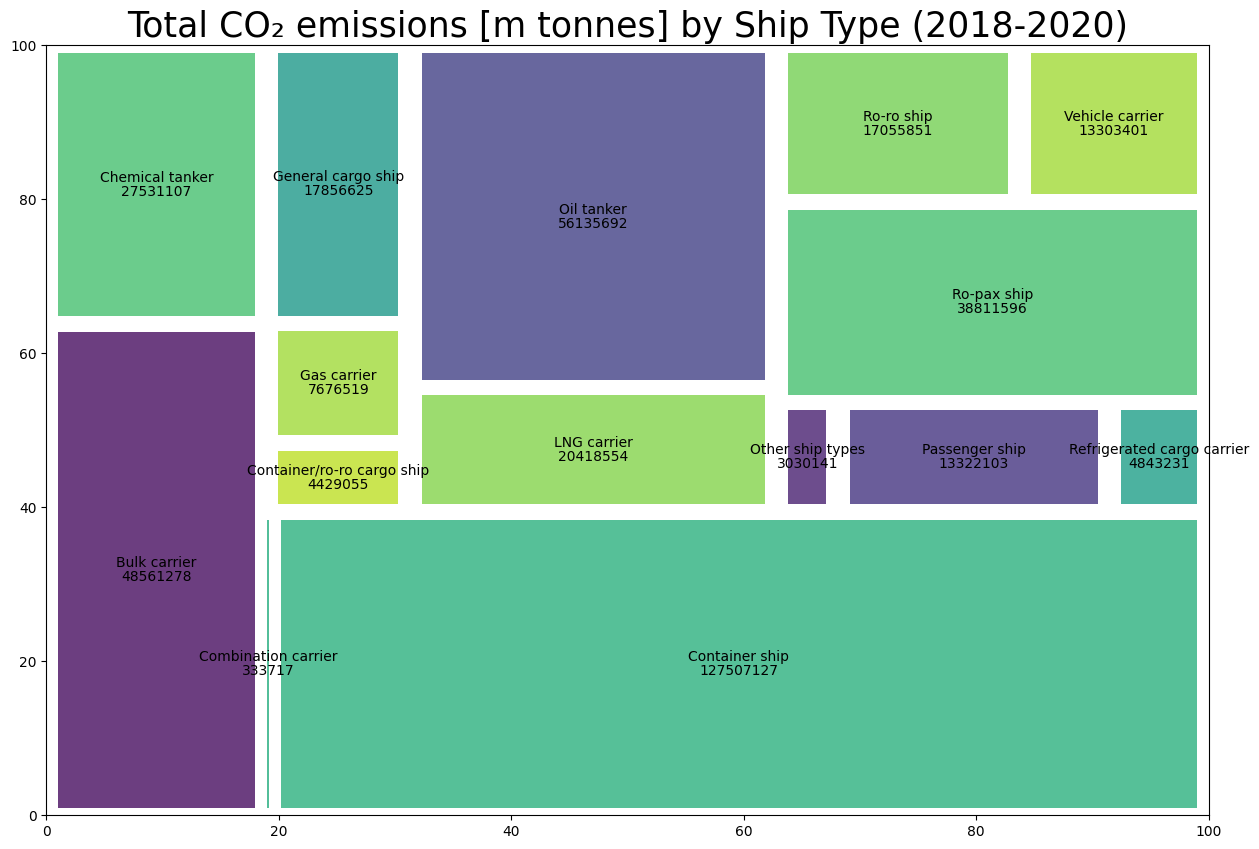

In [18]:
a = rel_data.groupby(['Ship type'])['Total CO₂ emissions [m tonnes]'].sum()
plt.figure(figsize=(15,10))
plt.title('Total CO₂ emissions [m tonnes] by Ship Type (2018-2020)', fontsize=25)
squarify.plot(sizes=a, value=a.astype(int), label=rel_data.groupby(['Ship type']).sum().index, alpha=.8, pad=True);

#### Annual average CO₂ emissions per distance

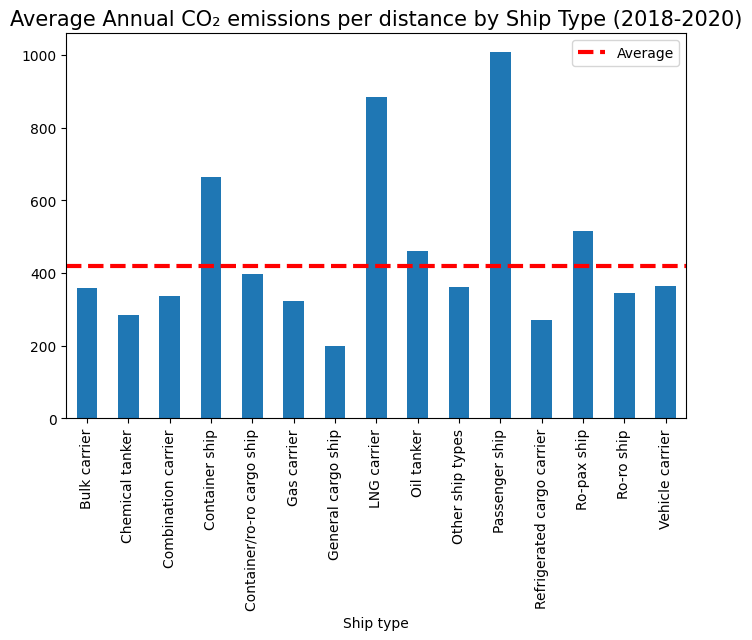

In [19]:
plt.figure(figsize=(8,5))
plt.axhline(y=rel_data['Annual average CO₂ emissions per distance [kg CO₂ / n mile]']\
                        .mean(), linewidth=3, label= 'Average', color='red',
                        linestyle='--')
plt.legend()
rel_data.groupby(['Ship type'])['Annual average CO₂ emissions per distance [kg CO₂ / n mile]']\
                                .mean().plot(kind='bar')
plt.title('Average Annual CO₂ emissions per distance by Ship Type (2018-2020)', fontsize=15);

#### Technical Efficiency by Ship Type

In [20]:
rel_data['Technical efficiency Measure'].value_counts()

EIV                23626
EEDI                8132
Not Applicable      2040
Not Applicable        57
Name: Technical efficiency Measure, dtype: int64

In [21]:
rel_data['Technical Efficiency Value [gCO₂/t·nm)]'] = rel_data['Technical Efficiency Value [gCO₂/t·nm)]'].astype(float)
rel_data[['Ship type', 'Technical efficiency Measure', 'Technical Efficiency Value [gCO₂/t·nm)]']]
rel_data['Technical Efficiency Value [gCO₂/t·nm)]'] = rel_data['Technical Efficiency Value [gCO₂/t·nm)]'].astype(float)

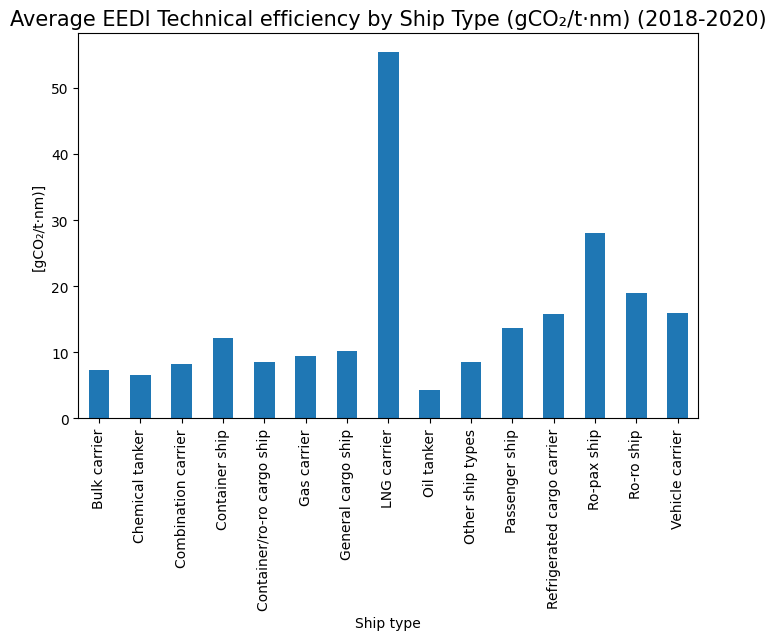

In [22]:
plt.figure(figsize=(8,5))
plt.title('Average EEDI Technical efficiency by Ship Type (gCO₂/t·nm) (2018-2020)', fontsize=15)
rel_data.loc[rel_data['Technical efficiency Measure'] == 'EEDI '].groupby(['Ship type'])['Technical Efficiency Value [gCO₂/t·nm)]'].mean().plot(kind='bar',
                                                                                                                                               ylabel='[gCO₂/t·nm)]');

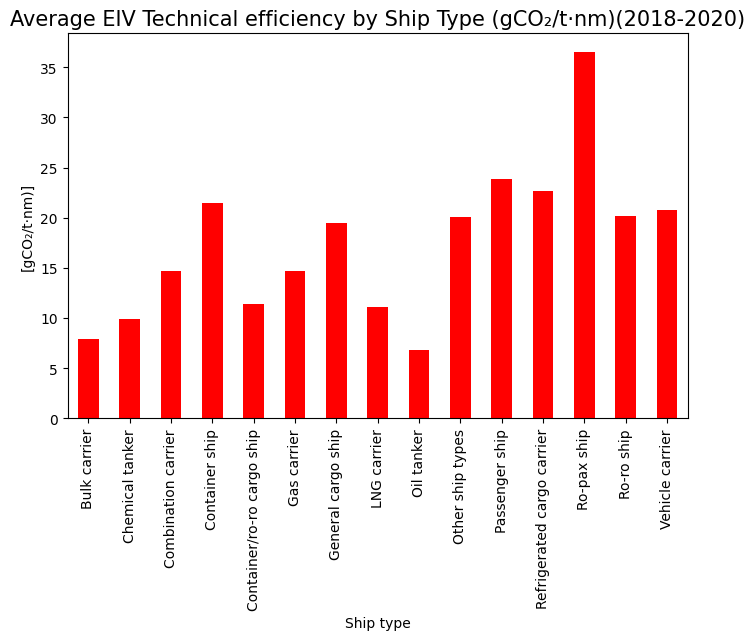

In [23]:
plt.figure(figsize=(8,5))
plt.title('Average EIV Technical efficiency by Ship Type (gCO₂/t·nm)(2018-2020)', fontsize=15)
rel_data.loc[rel_data['Technical efficiency Measure'] == 'EIV '].groupby(['Ship type'])['Technical Efficiency Value [gCO₂/t·nm)]'].mean().plot(kind='bar',
                                                                                                                                               ylabel='[gCO₂/t·nm)]',
                                                                                                                                              color='red');

### What is the relationship between ship Deadweight and emissions intensity?

There are two columns dealing with Deadweight (dwt):

* Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles]
* Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]

There are fewer missing values in the latter and it already dals with Co2 emissions so we'll go with that.

I'll multiply out miles from the field to isolate Co2 emissions per DWT and we'll plot the distribution of these values per ship type.

In [24]:
dwt_data = rel_data[rel_data['Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]'].notna()]

In [25]:
dwt_data.drop(dwt_data[dwt_data['Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]'] == 'Division by zero!'].index, inplace=True)

/var/folders/rq/2kw58rfd52d4st2xs5zszdlw0000gn/T/ipykernel_40504/3203032296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwt_data.drop(dwt_data[dwt_data['Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]'] == 'Division by zero!'].index, inplace=True)


In [26]:
dwt_data['c02-per-dwt'] = (dwt_data['Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]']) * \
                  (dwt_data['miles'])

/var/folders/rq/2kw58rfd52d4st2xs5zszdlw0000gn/T/ipykernel_40504/2095670043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwt_data['c02-per-dwt'] = (dwt_data['Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]']) * \


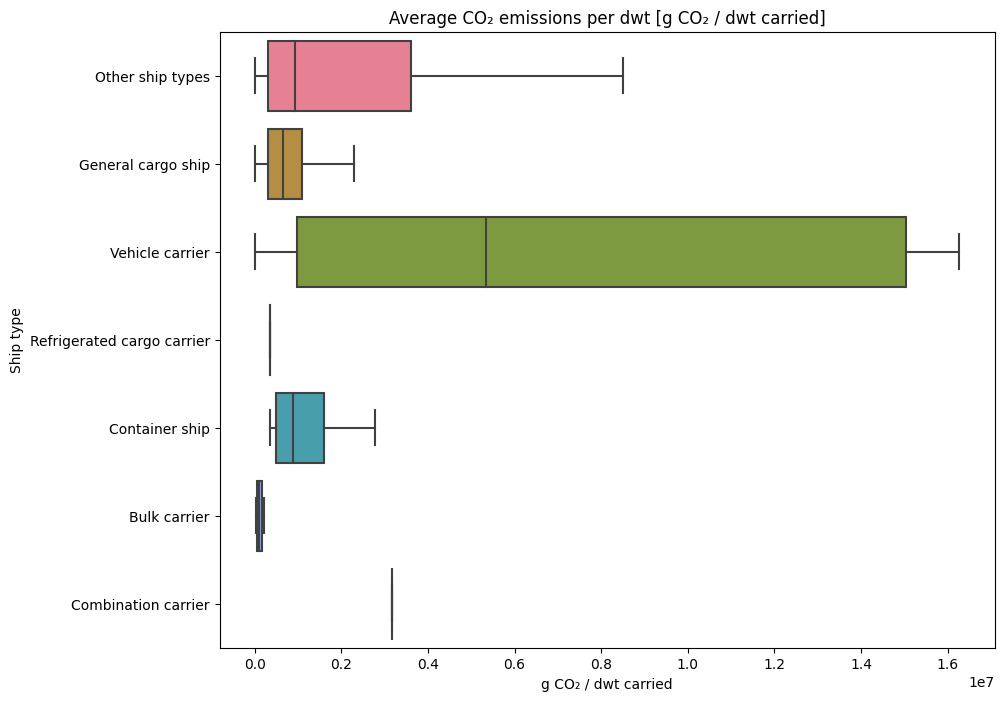

In [27]:
# Let's plot distribution of co2 emissions per dwt for each ship type
fig = plt.figure(1, figsize=(10,8))
ax = sns.boxplot(y="Ship type", x="c02-per-dwt", palette = 'husl', data=dwt_data, showfliers = False)
plt.xlabel('g CO₂ / dwt carried')
plt.title('Average CO₂ emissions per dwt [g CO₂ / dwt carried]')
plt.show()

#### Summary

* It looks like the relationship between ship Deadweight and Co2 emission intensity depends greatly on the type of ship
* Average emissions per DWT are greatest for vehicle carriers and lowest for general Cargo ships
* Variance in emissions within a ship category is pretty big too for ships like vehicle carriers

#### Future study ideas
Given more time, I'd like to see if we can find a linear relationship by trying to model emissions as a function of DWT with something like Linear Regression. However, this would involve more work (like checking for linear regression assumptions, etc.)

### How many miles did each vessel in the database travel?

Again, like some of the questions above this one has a bit of ambiguity built in.
* Does it mean how many miles each vessel traveled each year? Or in total for all years in this analysis?
* We assume 'miles' here refers to nautical miles

It's also impossible given the dataset to assume all distance metrics reported are comparable.
"MRV Regulation offers two alternatives, distance traveled may either be the distance of the most direct route between the ports of departure and arrival, or the actual distance traveled, expressed in nautical miles" - [ics-shipping.org](https://www.ics-shipping.org/wp-content/uploads/2020/08/ics-guidance-on-eu-mrv.pdf).

For simplicity, however, we'll assume all distance metrics are comparable.
Second, there is a question of how this data is to be presented. There are 16,538 unique vessels in this dataset. In the notebook, we will provide a quick visual representation of how this data is distributed.


/var/folders/rq/2kw58rfd52d4st2xs5zszdlw0000gn/T/ipykernel_40504/3531826594.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(rel_data,index = 'Ship type',


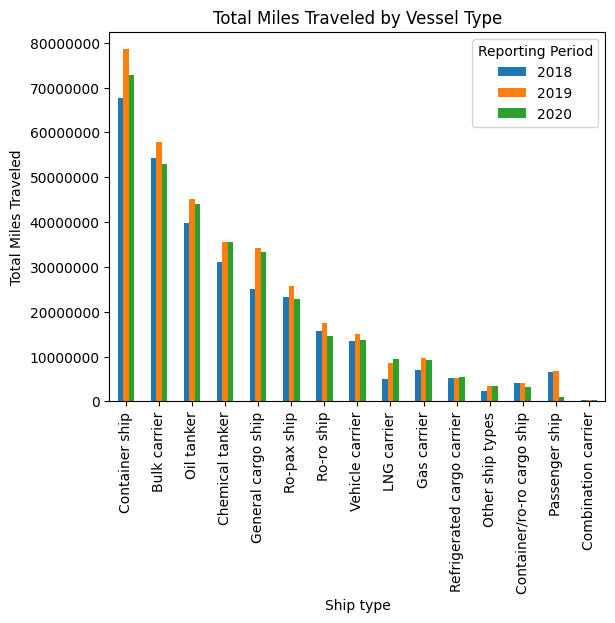

In [28]:
plt.rcParams["axes.formatter.limits"] = (-5, 12)
pd.pivot_table(rel_data,index = 'Ship type',
               columns = 'Reporting Period',
               aggfunc ='sum').sort_values(by=('miles', 2020), ascending=False)['miles']\
                                           .plot.bar(ylabel='Total Miles Traveled',
                                                     title='Total Miles Traveled by Vessel Type');

#### List of miles traveled by ship

In [29]:
rel_data.groupby(['Name', 'IMO Number'])['miles'].sum()

Name                IMO Number
0056 E.R. PUSAN     9211169        84059.401730
0057 E.R. SEOUL     9208021        61593.902090
0060 E.R. LONDON    9214202       101510.521020
0063 E.R. FRANCE    9214226        52553.050226
0064 E.R. KOBE      9222974        68704.299760
                                      ...      
ZOUZOU N.           9410222        37637.917149
ZUDAR               9574042        41254.278940
ZUIDERDAM           9221279        29886.143363
ZUMA                9308821        54240.350430
ZUMBI DOS PALMARES  9453810         8560.967104
Name: miles, Length: 16940, dtype: float64

To lookup a specific vessel, use one of the following cells. Simply uncomment the cell and run it.
**Note: It's better to use the IMO Number because the ship name for a given ship can be entered multiple ways. For example: '0056 E.R. PUSAN' and 'E.R. PUSAN' are both names that refer to the same ship in the database (ship IMO 9211169)**

In [30]:
# # Edit the IMO Number of the vessel you're interested in
# # e.g. imo_number = 9211169
# imo_number = 
# rel_data.loc[rel_data['IMO Number'] == imo_number].groupby(['Name', 'IMO Number'])['miles'].sum()

In [31]:
# # Edit the Ship Name of the vessel you're interested in
# # e.g. ship_name = E.R. PUSAN
# # WARNING: CASE SENSITIVE. NAME NEEDS TO BE EXACT MATCH.
# ship_name = 
# rel_data.loc[rel_data['Name'] == ship_name].groupby(['Name', 'IMO Number'])['miles'].sum()